# Clustering Methods

**Contents:**

This Jupyter Notebook provides an introduction to four popular machine learning algorithms, namely SVM (Support Vector Machines), K-Means, KNN (K-Nearest Neighbors), and Hierarchical Clustering. The notebook explains the basics of these algorithms, their differences, and their applications.

SVM is a supervised learning algorithm used for classification and regression tasks, while K-Means and Hierarchical Clustering are unsupervised learning algorithms used for clustering tasks. KNN is another supervised learning algorithm used for classification tasks. Each of these algorithms has its own strengths and weaknesses, and the selection of the appropriate algorithm depends on the type and structure of the data and the problem at hand.

**Supervised machine learning algorithm**
- [K-Nearest Neighbor (KNN)](#knn)
- [Support Vector Machine Model](#svm)

**Unsupervised machine learning algorithm**
- [K-means Clustering](#km)
    - [Steps without using the embedded function](#s1)
    - [Steps using the embedded function](#s2)
    - [Combine PCA & K-means Clustering](#s3)
- [Hierarchical Clustering](#hc)

<a name="knn"></a>
## K-Nearest Neighbor (KNN)

**Definition:**

K-nearest Neighbors (KNN) is a classification algorithm based on the the idea of assigning a new observation to the class or label that is most frequent among its “K” nearest neighbors. The main idea is that for a new observation we search the K nearest point (with minimum distance). These points will define the class of the new observation by majority voting.

<img style="float: middle;" src="https://miro.medium.com/v2/resize:fit:1374/format:webp/0*q0Xqkta3uKCkzV6o.png" width="50%" width="60%"> 

KNN is a supervised algorithm (which means that the training data is labeled), it is non-parametric and lazy (instance based). Why is lazy? Because **it does not explicitly learns the model**, but it saves all the training data and uses the whole training set for classification or prediction. 

**The steps of the KNN algorithm are (formal pseudocode):**

1. Initialize $selected_i$ = 0 for all i data points from the training set
2. Select a distance metric (let’s say we use Euclidean Distance)
    - Euclidean Distance: 
        - It’s calculated as the square root of the sum of the squared differences between the two point of interest.
        - $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$
    - Manhattan Distance: 
        - It's also called City Block Distance. You can imagine this as walking in a city which is organized as a matrix (or walking in Manhattan). The streets are the edges of the little squares from the matrix. If you want to go from square A to square B, you have to go on the edges of the little squares.
        - $|x_2-x_1| + |y_2-y_1|$
    - Minkowski Distance :
        - Generalization of Euclidean and Manhattan distance. It is a general formula to calculate distances in N dimensions
        - $(\sum_{i=1}^{n}|x_i-y_i|^p)^\frac{1}{p}$
    - Hamming Distance: Calculate the distance between binary vectors
**Why most of the time Euclidean distance is the preferred method for KNN?**
For calculating distances in KNN, we have multiple options available like Chi-square, Minkowsky, cosine similarity measure, and so on. But Euclidean distance is a widely preferred method for calculating the distance as **it returns us the shortest distance between two data points.**

3. For each training set data point i calculate the $distance_i$ = distance between the new data point and training point i
4. Choose the K parameter of the algorithm (K = number of neighbors considered), usually it’s an odd number, this way avoiding ties in majority voting
5. For j = 1 to K loop through all the training set data points and in each step select the point with minimum distance to the new observation (minimum distancei)
6. For each existing class count how many of the K selected data points are part of that class (voting)
7. Assign to the new observation the class with the maximum count (highest vote) — this is majority voting.

**Relationship between K and smoothness of border**

As you can see, if K=1 the border is very sharp, in zigzag but in the case K = 7, the border is smoother. So as we increase the value of K, the boundary becomes smoother. 

<img style="float: middle;" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*OkIIVp-nJSr3T46w.png" width="50%" width="60%"> 

**How to find the best value for K in the KNN algorithm?**

K is the numeric value that keeps the count of nearest neighbors, and we can’t have the hit, and trial method for multiple k values as the cost of calculation is pretty expensive hence we need to have certain guidelines to choose the optimal “K.”

- If one is choosing a very small value for K (say k=1,2) for reducing the cost of computation, then, it will lead to a noisy model which will surely be prone to outliers in the model.
- Moderately large values for K are preferred, but when it is too large, then, it will lead to the underfitting condition.


**How KNN is different from other classification algorithms in terms of its implementation?**

Choosing KNN over another classification algorithm solely depends on our requirements. Suppose we are working on a task that requires **flexibility** in the model then we can go for KNN, whereas if **efficiency** is the priority then we can go for other algorithms like Gradient descent or Logistic Regression.

**How KNN is more flexible?**

The main logic behind KNN flexibility is that **it is a non-parametric algorithm so it won’t have to make any assumption on the underlying dataset**. Still, at the same time, it is expensive in computation, unlike other classification algorithms.

**What do you understand by the curse of dimensionality, and how KNN is affected?**

The "curse of dimensionality" refers to the problems that arise when working with high-dimensional data. As the number of features or dimensions increases, the amount of data required to get reliable statistics grows exponentially. This means that **in high-dimensional spaces, the data becomes increasingly sparse and the distance between nearest neighbors becomes more and more similar, which can make it difficult to identify meaningful patterns in the data**.

The curse of dimensionality can affect the performance of the k-nearest neighbors (KNN) algorithm, which is a machine learning algorithm that relies on distance-based similarity measures. In KNN, the algorithm finds the k nearest neighbors to a query point based on the Euclidean distance or some other distance metric. **As the number of dimensions increases, the Euclidean distance between points becomes less meaningful, and the KNN algorithm may end up assigning similar distances to all points, making it difficult to find the true nearest neighbors**.

Furthermore, **as the number of dimensions increases, the number of points needed to adequately sample the space grows exponentially. This means that KNN may require impractically large amounts of data to achieve good performance in high-dimensional spaces**.

**To mitigate the curse of dimensionality when using KNN, some techniques include dimensionality reduction, feature selection, and distance-based techniques designed to work in high-dimensional spaces, such as locality-sensitive hashing**. Additionally, it is often useful to have a better understanding of the data and the features used to build the model, as well as the relationships between the features, in order to choose an appropriate distance metric and avoid overfitting.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('/Users/crystal/Desktop/Clustering Methods/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Standardize the data**

**Why data normalization is an important step in KNN?**

Standardization turned out to be a necessary step while dealing with the KNN algorithm as it is a distance-based algorithm, so if the data points are not within a specific range, then **different magnitudes can misclassify the data points in the testing phase.**

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Train model**

Parameters:

- n_neighbors: the value of k, the number of neighbors considered
- weights: if you want to use weighted attributes, here you can configure the weights. This takes values like uniform, distance (inverse distance to the new point) or callable which should be defined by the user. The default value is uniform.
- algorithm: if you want a different representation of the data, here you can use values like ball_tree, kd_tree or brute, default is auto which tries to automatically select the best representation for the current data set.
- metric: the distance metric (Euclidean, Manhattan, etc), default is Euclidean.

In [4]:
# KNN when K = 1,3,5,7 using distance metric of manhattan
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
for k in [1,3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("For k =", k, "the accuracy is:", accuracy)

For k = 1 the accuracy is: 0.88
For k = 3 the accuracy is: 0.93
For k = 5 the accuracy is: 0.93
For k = 7 the accuracy is: 0.93


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [5]:
# KNN when K = 1,3,5,7 using distance metric of manhattan
from sklearn.metrics import accuracy_score
for k in [1,3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("For k =", k, "the accuracy is:", accuracy)

For k = 1 the accuracy is: 0.87
For k = 3 the accuracy is: 0.93
For k = 5 the accuracy is: 0.93
For k = 7 the accuracy is: 0.93


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [6]:
# KNN when K = 1,3,5,7 using distance metric of manhattan
from sklearn.metrics import accuracy_score
for k in [1,3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("For k =", k, "the accuracy is:", accuracy)

For k = 1 the accuracy is: 0.87
For k = 3 the accuracy is: 0.93
For k = 5 the accuracy is: 0.93
For k = 7 the accuracy is: 0.93


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [7]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Evaluate the model 

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

Visualize the results on both Training and Test sets

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

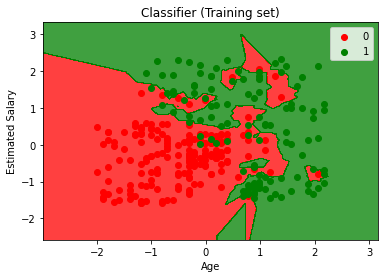

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

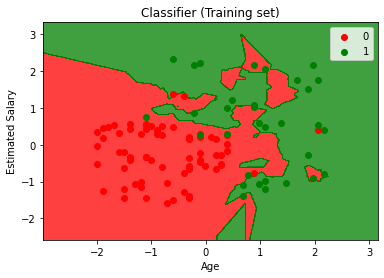

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a name="svm"></a>
## Support Vector Machine Model (SVM)

**Definition:**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification, regression, and outlier detection analysis.

**The goal of SVM is to find the best boundary or hyperplane that separates the different classes in a dataset. The hyperplane is defined by maximizing the distance between the closest data points from each class, which is also known as the margin. This approach is called "maximum margin classification".**

In SVM, the data points that lie on the margin boundary or the closest to it are called support vectors. These points are important because they determine the position and orientation of the hyperplane.

SVM can handle both linear and nonlinear data by using a kernel function to map the original feature space to a higher-dimensional space where the classes are separable by a hyperplane.

SVM is a powerful algorithm that can work well in high-dimensional spaces, even with a small sample size. It is also effective in handling data with complex boundary structures and can avoid overfitting by controlling the trade-off between the margin size and the classification error.

**Why choose Support Vector Machine over other algorithms?**

SVM is preferred over other algorithms when :
- The data is not regularly distributed.
- SVM is generally known to not suffer the condition of overfitting.
- Performance of SVM, and its generalization is better on the dataset.
- And, lastly, SVM is known to have the best results for classification types of problems.

**Pros and Cons of SVM**

*Pros:*
- It works really well with a clear margin of separation.
- It is effective in **high-dimensional spaces**.
- It is effective in cases where **the number of dimensions is greater than the number of samples**.
- It uses a subset of the training set in the decision function (called support vectors), so it is also memory efficient.

*Cons:*
- It doesn’t perform well **when we have a large data set because the required training time is higher**.
- It also doesn’t perform very well **when the data set has more noise**, i.e., target classes are overlapping.
- SVM doesn’t directly provide probability estimates; these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of the Python scikit-learn library.

**What is the support vector in the SVM algorithm?**

Support vectors are the most critical data points in SVM as they determine the position and orientation of the hyperplane. SVM learns from these support vectors and ignores the other data points. This approach helps SVM to be efficient and accurate even in high-dimensional spaces, making it a popular algorithm for classification tasks.

**What is the use of kernel in the SVM algorithm?**

In SVM, the kernel is a function that maps the input data from a lower-dimensional space to a higher-dimensional space, where the data is easier to separate into different classes. The most commonly used kernel functions are the linear kernel, polynomial kernel, and radial basis function (RBF) kernel.

**What is margin in SVM algorithms?**

The margin is the distance between the hyperplane and the closest data points from each class. SVM tries to find the hyperplane that maximizes this margin because it reduces the generalization error and increases the robustness of the model. The points closest to the hyperplane, which lie on the margin, are called support vectors.

<img style="float: left;" src="https://av-eks-blogoptimized.s3.amazonaws.com/SVM_4.jpg" width="40%">

**Sample Code**

In [ ]:
# Example: Have a linear SVM kernel
import numpy as np
import matplotlib.pyplot as pl
from sklearn import svm, datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel : C=1, gamma="auto"')
plt.show()

**Key Parameters**
- **C** is the penalty parameter, which determines the tradeoff between maximizing the margin and minimizing the classification error. *A small value of C will result in a wider margin but more classification errors, while a larger value of C will result in a narrower margin but fewer classification errors*.
- The **kernel** parameter determines the type of kernel function used to map the data into a higher-dimensional space. The kernel can be linear, polynomial, or radial basis function (RBF). The gamma parameter is used to control the shape of the RBF kernel. *A high gamma value will result in overfitting, while a low gamma value will result in underfitting*.

In [ ]:
# Example: Use SVM rbf kernel
# Change the kernel function type to rbf in the below line and look at the impact.
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel: C=1, gamma="auto"')
plt.show()

**gamma**: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid.’ The higher value of gamma will try to fit them exactly as per the training data set, i.e., generalization error and cause over-fitting problem.

In [ ]:
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel: C=1, gamma=10')
plt.show()

In [ ]:
svc = svm.SVC(kernel='rbf', C=1,gamma=100).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel: C=1, gamma=100')
plt.show()

**C**: Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.

In [ ]:
svc = svm.SVC(kernel='rbf', C=100,gamma='auto').fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel: C=100, gamma="auto"')
plt.show()

In [ ]:
svc = svm.SVC(kernel='rbf', C=1000,gamma='auto').fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel: C=1000, gamma="auto"')
plt.show()

<a name="km"></a>
## K-Means Clustering

**Definition:**

K-means clustering is a widely used method for cluster analysis where the aim is to **partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized**. 

Hierarchical clustering and k-means clustering are two popular techniques in the field of unsupervised learning used for clustering data points into distinct groups. While k-means clustering divides data into a predefined number of clusters, hierarchical clustering creates a hierarchical tree-like structure to represent the relationships between the clusters.

**Evaluation Metrics for Clustering**
- Inertia : 
    - Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster. Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; otherwise, Manhattan distance in case most of the features are categorical. We calculate this for all the clusters; the final inertial value is the sum of all these distances. This distance within the clusters is known as intracluster distance. So, **inertia gives us the sum of intracluster distances**.
    - The lower is better 
    - in order to meet the first property of clustering : All the data points in a cluster should be similar to each other. 

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-08-15-32-17.png" width="30%"> 

- Dunn Index : 
    - The Dunn index takes into account the distance between two clusters. This distance between the centroids of two different clusters is known asinter-cluster distance. 
    - Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances.
    - $Dunn Index = \frac{min(inter cluster distance)}{max(intra cluster distance)}$
    - in order to meet the second property of clustering : The data points from different clusters should be as different as possible.
    - The larger is better : 
        - In order to maximize the value of the Dunn index, the numerator should be maximum. 
        - The denominator should be minimum to maximize the Dunn index. 
        
- Silhouette Score
    - The silhouette score and plot are used to evaluate the quality of a clustering solution produced by the k-means algorithm. The silhouette score **measures the similarity of each point to its own cluster compared to other clusters**, and the silhouette plot visualizes these scores for each sample. 
    - **A high silhouette score indicates that the clusters are well separated**, and each sample is more similar to the samples in its own cluster than to samples in other clusters. **A silhouette score close to 0 suggests overlapping clusters, and a negative score suggests poor clustering solutions**.
- Silhouette Coefficient
    - $s = \frac{b-a}{max(a,b)}$
    - Measures how similar points are in its cluster compared to other clusters.
    - a: The average distance between an example and all other points in the same cluster. (similarity)
    - b: The average distance between an example and all other points in the next closest cluster. (dissimilarity)
    - Silhouette coefficient varies between - 1 and 1 for any given example.
        - 1: the example is in the right cluster as b >> a
        - 0: cluster separation and cohesion are equal.
        - -1: the example is in a wrong cluster as a >> b

**Pros and Cons**

*Pros*
- Easy to implement.
- Computationally efficient.
- Speed is K-means’ big win.

*Cons*
- The number of clusters, , has to be determined. An inappropriate choice of can result in poor clustering performance.
- Stability: Initial positions of centroids influence the final position, so two runs can result in two different clusters.
- The shapes of clusters can only be circular (because Euclidean distance doesn't prefer one direction over another). It does not work well for datasets requiring flexible cluster shapes.
    - e.g. K-means is unable to separate this half-moon-shaped dataset.
    
<img style="float: middle;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR64MMV1FQFB7UPPs0LSM_-vDcEUlwyMPytwPf2tiQ1woszRu8A" width="30%"> 

- K-means is susceptible to curse of dimensionality. In very high-dimensional spaces, Euclidean distances tend to become inflated.
    - Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means can alleviate this problem and speed up the computations.


**How to choose K?**
- elbow method : 
    - Plot elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.
    - the cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.
    


**Steps**

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-21-43.png" width="20%"> 

1. Choose the number of clusters k
2. Select k random points from the data as centroids

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-23-55.png" width="20%"> 

3. Assign all the points to the closest cluster centroid
<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-24-35.png" width="20%"> 


4. Recompute the centroids of newly formed clusters

Now, once we have assigned all of the points to either cluster, the next step is to compute the centroids of newly formed clusters:

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-26-59.png
" width="20%"> 

Here, the red and green crosses are the new centroids.

5. Repeat steps 3 and 4
<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-28-14.png
" width="20%"> 
The step of computing the centroid and assigning all the points to the cluster based on their distance from the centroid is a single iteration. But wait – when should we stop this process? It can’t run till eternity, right?

**Stopping Criteria for K-Means Clustering**
- Centroids of newly formed clusters do not change
- Points remain in the same cluster
- Maximum number of iterations is reached

<a name="s1"></a>
**Steps without using the embedded function**

In [12]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv('/Users/crystal/Desktop/Clustering Methods/loan_train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

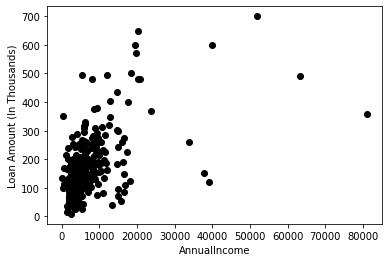

In [14]:
X = train[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

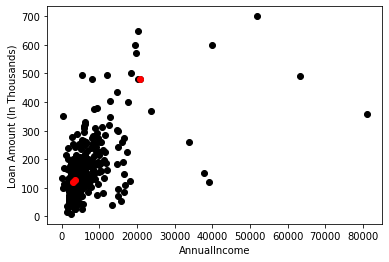

In [15]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [16]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=E

2533.033475719846


<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

3809.2037760500402


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


5558.073792608439


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


8176.09882499403


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


11158.115810646053


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


765.277266471567


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


378.1537189719533


<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

106.33363285023478


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


35.40708263028314
0.0


<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


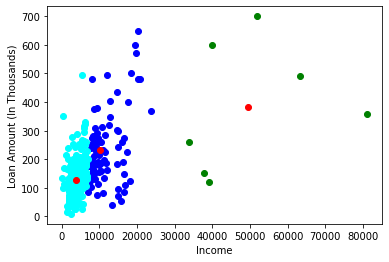

In [17]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#### Challenges Faced with K-Means
- The size of clusters is different. 

The leftmost and the rightmost clusters are of smaller size compared to the central cluster. Now, if we apply k-means clustering on these points, the results will be something like this:

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-13-15-26.png" width="40%"> 

- The densities of the original points are different

Here, the points in the red cluster are spread out, whereas the points in the remaining clusters are closely packed together. Now, if we apply k-means on these points, we will get clusters like this:

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-13-19-05.png" width="40%"> 


We can see that the compact points have been assigned to a single cluster. Whereas the points that are spread loosely but were in the same cluster have been assigned to different clusters. 

#### Solution  
One of the solutions is to use a higher number of clusters. This is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called **K-Means++** that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

**K-Means++** : It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

**The steps to initialize the centroids using K-Means++ are:**
1. The first cluster is chosen uniformly at random from the data points we want to cluster. This is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-15-21-32.png" width="20%"> 

2. Next, we compute the distance (D(x)) of each data point (x) from the cluster center that has already been chosen

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-15-23-39.png" width="20%"> 

3. Then, choose the new cluster center from the data points with the probability of x being proportional to (D(x))2

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-15-26-07.png" width="20%">  

In this case, the red point will be selected as the next centroid. Now, to select the last centroid, we will take the distance of each point from its closest centroid, and the point having the largest squared distance will be selected as the next centroid:

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-15-32-20.png" width="20%"> 

<img style="float: middle;" src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-15-33-17.png" width="20%"> 

4. We then repeat steps 2 and 3 until k clusters have been chosen

<a name="s2"></a>
**Steps using embedded functions**

In [18]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [19]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("/Users/crystal/Desktop/Clustering Methods/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
# statistics of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [22]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [23]:
# inertia on the fitted data
kmeans.inertia_

2599.3855593561393

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anacond

Text(0, 0.5, 'Inertia')

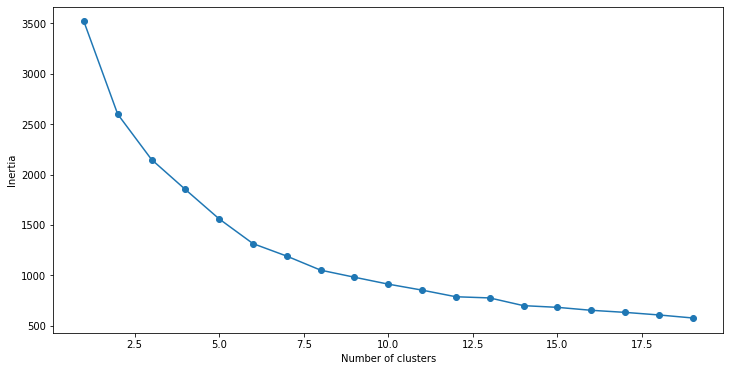

In [24]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. 

In [25]:
# k means using 5 clusters and k-means++ initialization
kmeans_kplus = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++') 
kmeans_kplus.fit(data_scaled)
pred = kmeans_kplus.predict(data_scaled)
print(kmeans_kplus.inertia_)

1548.8659343652662


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


We can initialized the set of cluster centroids before running k-means by setting init to "k-means++", and we can set init to "random" to ensure the centroids are all different. This will make SSE larger.

In [26]:
# k means using 5 clusters and k-means++ initialization
kmeans_random = KMeans(n_jobs = -1, n_clusters = 5, init='random') 
kmeans_random.fit(data_scaled)
pred = kmeans_random.predict(data_scaled)
print(kmeans_random.inertia_)

1567.4493550056065


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Let’s look at the value count of points in each of the above-formed clusters:

In [27]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    200
1    126
4     90
3     14
0     10
Name: cluster, dtype: int64

<a name="s3"></a>
**Combine PCA & K-means Clustering**

About the dataset : It contains 217 columns of hobbies, where 1 means yes.

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, normalize, scale
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
# Import Dataset
df = pd.read_csv("/Users/crystal/Desktop/Clustering Methods/kaggle_Interests_group.csv")
df.fillna(0, inplace = True)
df = df.iloc[:,2:]
df.head()

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Let us now move on to building and training the model. Even though it is specified in the dataset that it contains 4 groups, but still we will implement the “elbow method” to determine the number of clusters. This can be done by using WCSS (sum of squares of distances of datapoints)

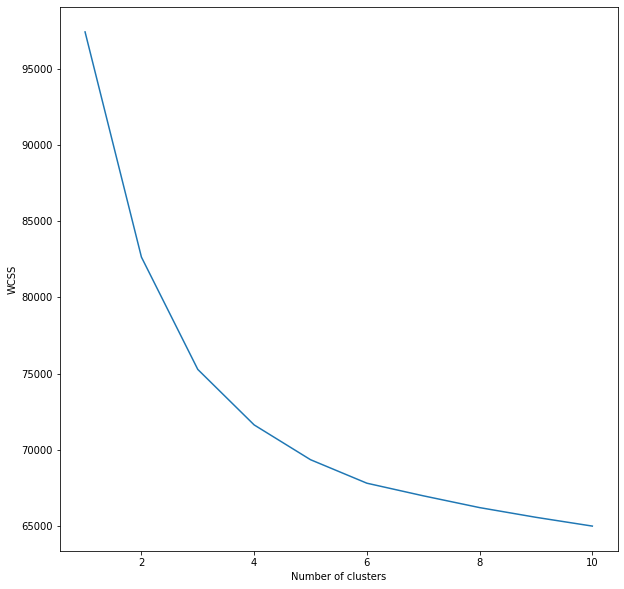

In [30]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next step is to convert our dataset from multidimensions to 2 dimensions.

In [31]:
pca = PCA(2)
data = pca.fit_transform(df)

Next we plot and check the variance of the components.

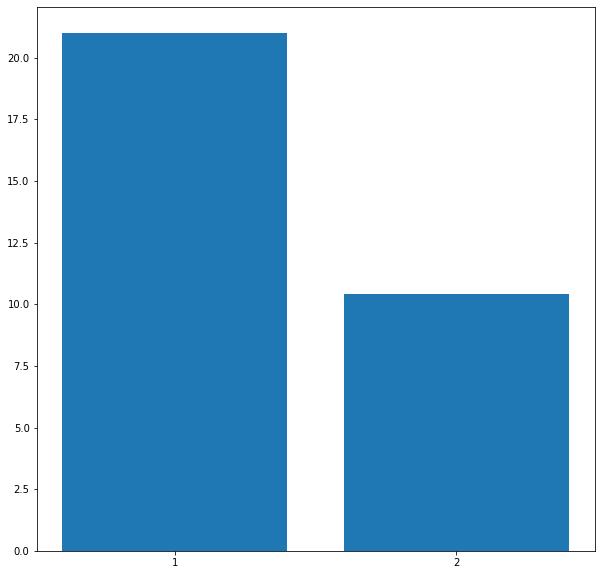

In [32]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

Now we will train our model based on the new features generated by PCA(). Since we have only 2 Principal Components (PC1 and PC2), we will get a 2D figure with 6 clusters.

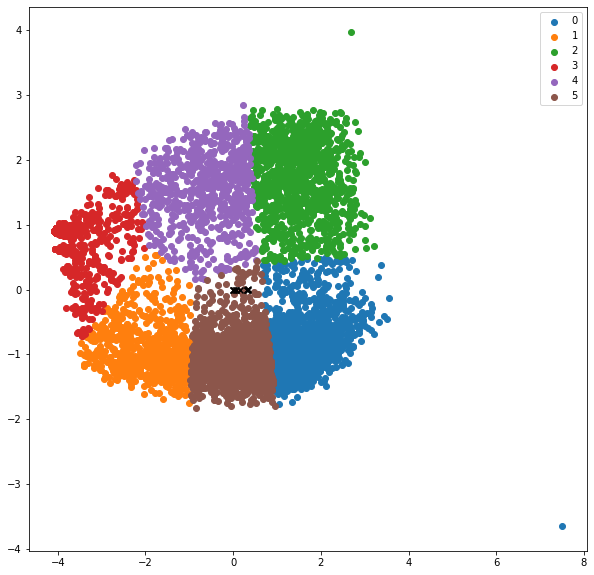

In [33]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

<a name="hc"></a>
## Hierarchical Clustering

**Definition:**

Hierarchical Clustering is an unsupervised machine learning algorithm used for clustering tasks. It works by creating a hierarchy of clusters that can be visualized as a dendrogram. Hierarchical Clustering is useful when the number of clusters is unknown, and the data is continuous.

**Basic Steps:**
- Let’s say we have the below points and we want to cluster them into groups:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-10-32.png" width="25%"> 
- We can assign each of these points to a separate cluster:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png" width="25%"> 
- Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-12-35.png" width="25%"> 

**Why using it ?**

Hierarchical clustering is useful because it does not require us to pre-define the number of clusters in the data, unlike K-means. In K-means, we have to decide the number of clusters at the beginning of the algorithm, which can be challenging in cases where the number of clusters is not known beforehand.

Hierarchical clustering solves this problem by forming a hierarchy of clusters in a step-by-step manner. It starts by considering each data point as a separate cluster and then merges them based on their similarity. This process is repeated until all the data points belong to a single cluster. This approach allows us to visualize the clusters in a dendrogram, which provides insights into the relationships between the data points and the formation of clusters.

In summary, Hierarchical clustering is useful because it does not require us to pre-define the number of clusters and provides a dendrogram visualization of the clustering process.

**Types:**
1. **Agglomerative hierarchical clustering** : We are merging (or adding) the clusters at each step, therefore, this type of clustering is also known as additive hierarchical clustering.

- We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png" width="25%"> 
- Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-31-06.png" width="25%"> 

2. **Divisive Hierarchical clustering** : Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.
- All these points will belong to the same cluster at the beginning:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-12-35.png" width="25%">
- Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point:
<img style="float: middle;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png" width="25%">

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data = pd.read_csv('/Users/crystal/Desktop/Clustering Methods/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

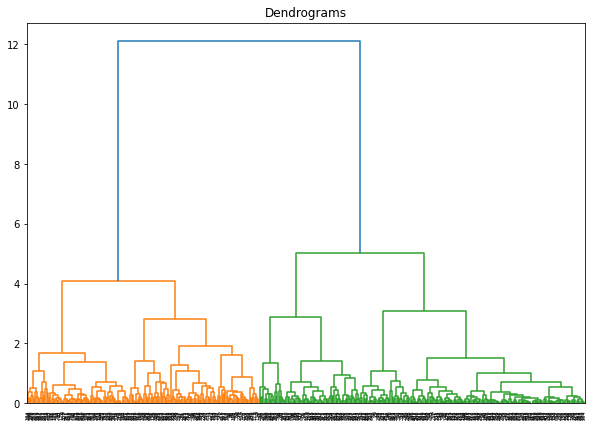

In [44]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

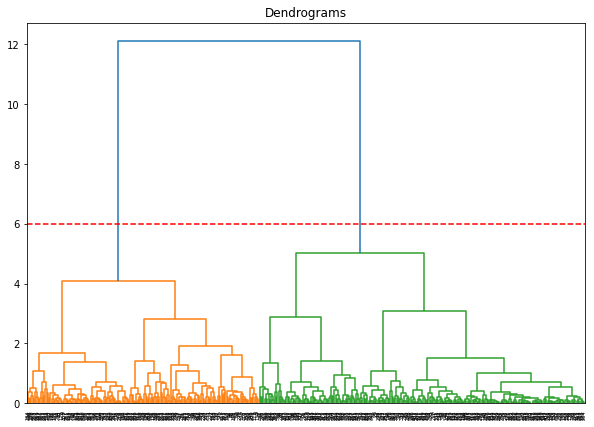

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

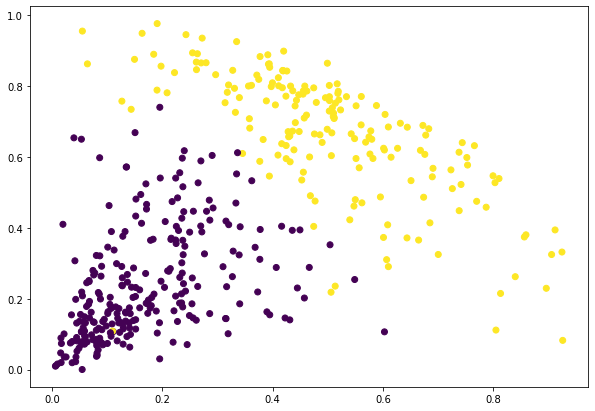

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 